In [42]:
from math import gcd
from random import sample
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from scipy.stats import norm
from collections import Counter
from scipy.stats import gamma, poisson

# Find out all the possible final number when $n = 6$.

In [12]:
def all_outcomes(numbers):
    def recurse(numbers):
        # If only one number remains, add it to the set of outcomes
        if len(numbers) == 1:
            outcomes.add(numbers[0])
            return

        for i in range(len(numbers)):
            for j in range(i + 1, len(numbers)):
                difference = abs(numbers[i] - numbers[j])
                # Generate the new list of numbers after removing the chosen pair and adding the difference
                new_numbers = [numbers[k] for k in range(len(numbers)) if k != i and k != j] + [difference]
                recurse(new_numbers)

    outcomes = set()
    recurse(numbers)
    return outcomes

# Numbers from 1 to 6
numbers = list(range(1, 7))

all_outcomes = all_outcomes(numbers)

print("All possible outcomes of the final number:", all_outcomes)


All possible outcomes of the final number: {1, 3, 5}


# Possible outcomes when $n = 8$. 

In [15]:
def all_outcomes(numbers):
    def recurse(numbers):
        # If only one number remains, add it to the set of outcomes
        if len(numbers) == 1:
            outcomes.add(numbers[0])
            return

        for i in range(len(numbers)):
            for j in range(i + 1, len(numbers)):
                difference = abs(numbers[i] - numbers[j])
                # Generate the new list of numbers after removing the chosen pair and adding the difference
                new_numbers = [numbers[k] for k in range(len(numbers)) if k != i and k != j] + [difference]
                recurse(new_numbers)

    outcomes = set()
    recurse(numbers)
    return outcomes

# Numbers from 1 to 8
numbers = list(range(1, 9))

all_outcomes = all_outcomes(numbers)

print("All possible outcomes of the final number:", all_outcomes)


All possible outcomes of the final number: {0, 2, 4, 6, 8}


# Possible outcomes when $n = 10$.

In [20]:
def find_all_outcomes_memo(numbers):
    memo = {}

    def recurse(numbers):
        # Convert the list of numbers to a tuple so it can be used as a key in the memo dictionary
        key = tuple(sorted(numbers))
        # If the result is already in the memo, return it
        if key in memo:
            return memo[key]

        outcomes = set()
        if len(numbers) == 1:
            outcomes.add(numbers[0])
        else:
            for i in range(len(numbers)):
                for j in range(i + 1, len(numbers)):
                    difference = abs(numbers[i] - numbers[j])
                    new_numbers = [numbers[k] for k in range(len(numbers)) if k != i and k != j] + [difference]
                    outcomes |= recurse(new_numbers)
        memo[key] = outcomes
        return outcomes

    return recurse(numbers)

numbers = list(range(1, 11))
outcomes = find_all_outcomes_memo(numbers)
print(outcomes)


{1, 3, 5, 7, 9}


# Possible outcomes when $n = 14$.

In [21]:
def find_all_outcomes_memo(numbers):
    memo = {}

    def recurse(numbers):
        # Convert the list of numbers to a tuple so it can be used as a key in the memo dictionary
        key = tuple(sorted(numbers))
        # If the result is already in the memo, return it
        if key in memo:
            return memo[key]

        outcomes = set()
        if len(numbers) == 1:
            outcomes.add(numbers[0])
        else:
            for i in range(len(numbers)):
                for j in range(i + 1, len(numbers)):
                    difference = abs(numbers[i] - numbers[j])
                    new_numbers = [numbers[k] for k in range(len(numbers)) if k != i and k != j] + [difference]
                    outcomes |= recurse(new_numbers)
        memo[key] = outcomes
        return outcomes

    return recurse(numbers)

numbers = list(range(1, 15))
outcomes = find_all_outcomes_memo(numbers)
print(outcomes)


{1, 3, 5, 7, 9, 11, 13}


# Validation of final number is even if $4|n$.

In [3]:
def simulate_game(n):
    outcomes = []
    for initial_n in range(4, n+1, 4):
        numbers = list(range(1, initial_n + 1))
        while len(numbers) > 1:
            # For simplicity take the first two numbers
            a, b = numbers[0], numbers[1]
            difference = abs(a - b)
            # Remove the two numbers and add their difference
            numbers = numbers[2:] 
            numbers.append(difference)  
        # Check if the final number is even
        outcomes.append((initial_n, numbers[0] % 2 == 0))
    return outcomes

validate_outcomes = simulate_game(2024)
print(validate_outcomes)


[(4, True), (8, True), (12, True), (16, True), (20, True), (24, True), (28, True), (32, True), (36, True), (40, True), (44, True), (48, True), (52, True), (56, True), (60, True), (64, True), (68, True), (72, True), (76, True), (80, True), (84, True), (88, True), (92, True), (96, True), (100, True), (104, True), (108, True), (112, True), (116, True), (120, True), (124, True), (128, True), (132, True), (136, True), (140, True), (144, True), (148, True), (152, True), (156, True), (160, True), (164, True), (168, True), (172, True), (176, True), (180, True), (184, True), (188, True), (192, True), (196, True), (200, True), (204, True), (208, True), (212, True), (216, True), (220, True), (224, True), (228, True), (232, True), (236, True), (240, True), (244, True), (248, True), (252, True), (256, True), (260, True), (264, True), (268, True), (272, True), (276, True), (280, True), (284, True), (288, True), (292, True), (296, True), (300, True), (304, True), (308, True), (312, True), (316, True)

# Probability of each number occurrence

In [17]:
def find_outcome_probabilities(numbers):
    def recurse(numbers, outcomes):
        if len(numbers) == 1:
            outcomes[numbers[0]] = outcomes.get(numbers[0], 0) + 1
            return
        for i in range(len(numbers)):
            for j in range(i + 1, len(numbers)):
                difference = abs(numbers[i] - numbers[j])
                new_numbers = [numbers[k] for k in range(len(numbers)) if k != i and k != j] + [difference]
                recurse(new_numbers, outcomes)

    outcomes = {}
    recurse(numbers, outcomes)
    
    # Calculate total number of simulations
    total_simulations = sum(outcomes.values())
    
    # Calculate and print probabilities
    probabilities = {outcome: count / total_simulations for outcome, count in outcomes.items()}
    
    return probabilities

# Initial set of numbers from 1 to 4
numbers = list(range(1, 5))
# Find probabilities of all possible outcomes
probabilities = find_outcome_probabilities(numbers)

# Print probabilities
for outcome, probability in sorted(probabilities.items()):
    print(f"Probability of {outcome}: {probability:.4f}")


Probability of 0: 0.4444
Probability of 2: 0.4444
Probability of 4: 0.1111


In [17]:
def find_outcome_probabilities(numbers):
    def recurse(numbers, outcomes):
        if len(numbers) == 1:
            outcomes[numbers[0]] = outcomes.get(numbers[0], 0) + 1
            return
        for i in range(len(numbers)):
            for j in range(i + 1, len(numbers)):
                difference = abs(numbers[i] - numbers[j])
                new_numbers = [numbers[k] for k in range(len(numbers)) if k != i and k != j] + [difference]
                recurse(new_numbers, outcomes)

    outcomes = {}
    recurse(numbers, outcomes)
    
    # Calculate total number of simulations
    total_simulations = sum(outcomes.values())
    
    # Calculate and print probabilities
    probabilities = {outcome: count / total_simulations for outcome, count in outcomes.items()}
    
    return probabilities

# Initial set of numbers from 1 to 8
numbers = list(range(1, 9))
# Find probabilities of all possible outcomes
probabilities = find_outcome_probabilities(numbers)

# Print probabilities
for outcome, probability in sorted(probabilities.items()):
    print(f"Probability of {outcome}: {probability:.4f}")


Probability of 0: 0.2876
Probability of 2: 0.3839
Probability of 4: 0.2228
Probability of 6: 0.0927
Probability of 8: 0.0130


# Probability of each number when $n=8$ and make the plot

{0: 0.28759385235575713, 2: 0.3838548752834467, 4: 0.22283698664651044, 6: 0.0926832955404384, 8: 0.013030990173847316}


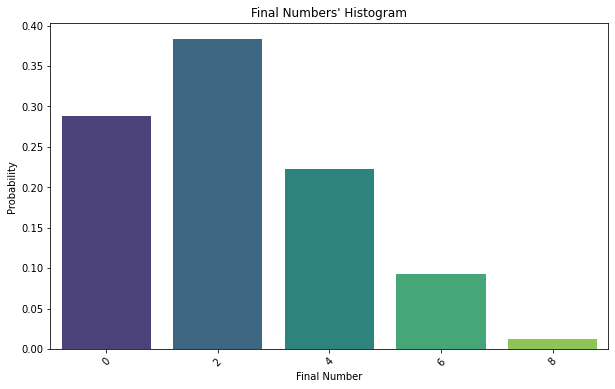

In [19]:
def find_probabilities_memo(numbers):
    memo = {}

    def recurse(numbers):
        key = tuple(sorted(numbers))
        if key in memo:
            return memo[key]

        if len(numbers) == 1:
            return {numbers[0]: 1}

        outcomes = defaultdict(int)
        for i in range(len(numbers)):
            for j in range(i + 1, len(numbers)):
                difference = abs(numbers[i] - numbers[j])
                new_numbers = [numbers[k] for k in range(len(numbers)) if k != i and k != j] + [difference]
                for outcome, count in recurse(new_numbers).items():
                    outcomes[outcome] += count

        memo[key] = outcomes
        return outcomes

    total_outcomes = recurse(numbers)
    total_paths = sum(total_outcomes.values())
    probabilities = {outcome: count / total_paths for outcome, count in total_outcomes.items()}
    return probabilities

# Calculate probabilities for 8 pieces of paper
numbers = list(range(1, 9))
probabilities = find_probabilities_memo(numbers)
print(probabilities)
# Plotting
outcomes = list(probabilities.keys())
probs = [probabilities[outcome] for outcome in outcomes]

plt.figure(figsize=(10, 6))
sns.barplot(x=outcomes, y=probs, palette="viridis")
plt.title("Final Numbers' Histogram")
plt.xlabel("Final Number")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.show()

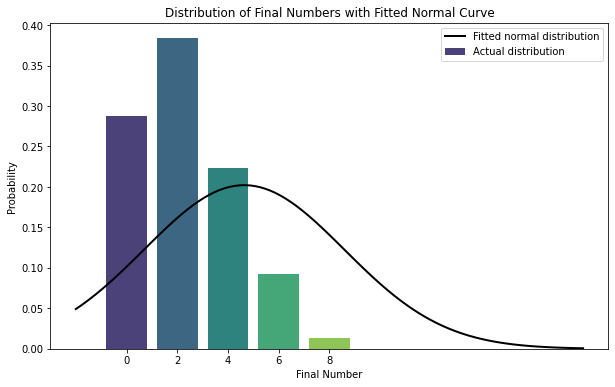

In [16]:
# Function to calculate probabilities with memoization
def find_probabilities_memo(numbers):
    memo = {}
    def recurse(numbers):
        key = tuple(sorted(numbers))
        if key in memo:
            return memo[key]
        if len(numbers) == 1:
            return {numbers[0]: 1}
        outcomes = defaultdict(int)
        for i in range(len(numbers)):
            for j in range(i + 1, len(numbers)):
                difference = abs(numbers[i] - numbers[j])
                new_numbers = [numbers[k] for k in range(len(numbers)) if k != i and k != j] + [difference]
                for outcome, count in recurse(new_numbers).items():
                    outcomes[outcome] += count
        memo[key] = outcomes
        return outcomes
    total_outcomes = recurse(numbers)
    total_paths = sum(total_outcomes.values())
    probabilities = {outcome: count / total_paths for outcome, count in total_outcomes.items()}
    return probabilities

# Calculate probabilities for 8 pieces of paper
numbers = list(range(1, 9))
probabilities = find_probabilities_memo(numbers)

# Prepare data for plotting
outcomes = np.array(list(probabilities.keys()))
probs = np.array([probabilities[outcome] for outcome in outcomes])

# Calculate weighted mean (mu) and standard deviation (sigma)
mu = np.average(outcomes, weights=probs)
variance = np.average((outcomes - mu)**2, weights=probs)
sigma = np.sqrt(variance)

# Plotting the actual distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=outcomes, y=probs, palette="viridis", label="Actual distribution")

# Plotting the fitted normal distribution curve
x = np.linspace(min(outcomes)-1, max(outcomes)+1, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k-', linewidth=2, label="Fitted normal distribution")

plt.title("Distribution of Final Numbers with Fitted Normal Curve")
plt.xlabel("Final Number")
plt.ylabel("Probability")
plt.legend()
plt.show()


# Probability of each number in the possible outcomes of $n = 16$.

Final number 0: Probability = 0.1663
Final number 2: Probability = 0.2713
Final number 4: Probability = 0.2103
Final number 6: Probability = 0.1494
Final number 8: Probability = 0.1008
Final number 10: Probability = 0.0605
Final number 12: Probability = 0.0285
Final number 14: Probability = 0.0121
Final number 16: Probability = 0.0008


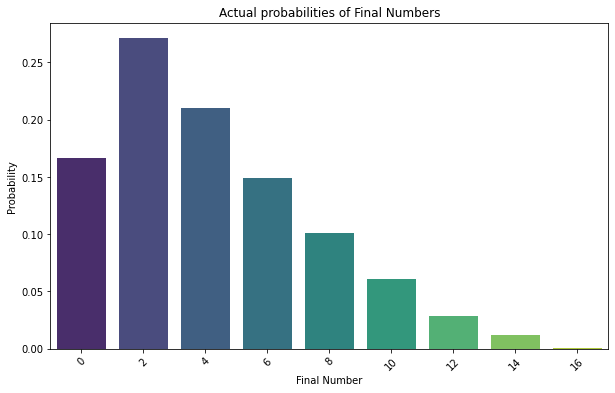

In [41]:
def monte_carlo_simulation(num_papers=8, num_simulations=10000):
    outcomes = []

    for _ in range(num_simulations):
        papers = list(range(1, num_papers + 1))
        while len(papers) > 1:
            
            a, b = np.random.choice(papers, size=2, replace=False)
            papers.remove(a)
            papers.remove(b)
            papers.append(abs(a - b))
        
        outcomes.append(papers[0])
    
    # Count occurrences and calculate probabilities
    outcome_counts = Counter(outcomes)
    probabilities = {outcome: count / num_simulations for outcome, count in outcome_counts.items()}
    
    return probabilities

# 16 pieces of paper
probabilities = monte_carlo_simulation(num_papers=16, num_simulations=10000)


for outcome, probability in sorted(probabilities.items()):
    print(f"Final number {outcome}: Probability = {probability:.4f}")


outcomes = list(probabilities.keys())
probs = [probabilities[outcome] for outcome in outcomes]


plt.figure(figsize=(10, 6))
sns.barplot(x=outcomes, y=probs, palette="viridis")
plt.title("Actual probabilities of Final Numbers")
plt.xlabel("Final Number")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.show()

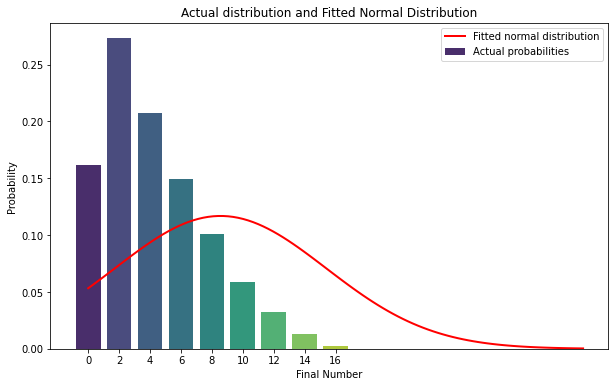

In [40]:
probabilities = monte_carlo_simulation(num_papers=16, num_simulations=10000)
outcomes = np.array(list(probabilities.keys()))
probs = np.array([probabilities[outcome] for outcome in outcomes])

# Calculate weighted mean and standard deviation 
mu = np.average(outcomes, weights=probs)
variance = np.average((outcomes - mu)**2, weights=probs)
sigma = np.sqrt(variance)

plt.figure(figsize=(10, 6))
sns.barplot(x=outcomes, y=probs, palette="viridis", label="Actual probabilities")

# Plotting the fitted normal distribution curve
x = np.linspace(outcomes.min(), outcomes.max(), 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r-', lw=2, label="Fitted normal distribution")

plt.title("Actual distribution and Fitted Normal Distribution")
plt.xlabel("Final Number")
plt.ylabel("Probability")
plt.legend()
plt.show()


# Fit with Gamma distribution

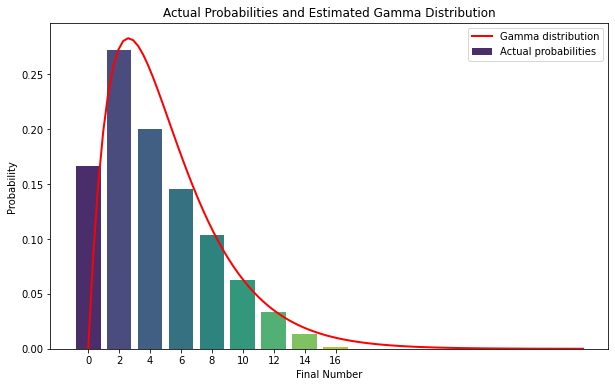

In [58]:
probabilities = monte_carlo_simulation(num_papers=16, num_simulations=10000)
outcomes = np.array(list(probabilities.keys()))
probs = np.array([probabilities[outcome] for outcome in outcomes])


plt.figure(figsize=(10, 6))
sns.barplot(x=outcomes, y=probs, palette="viridis", label="Actual probabilities")

# Parameters
a = 2  # shape parameter
scale = 1.3  # scale parameter

x = np.linspace(0, outcomes.max(), 100)
y = gamma.pdf(x, a, scale=scale)

plt.plot(x, y, 'r-', lw=2, label="Gamma distribution")
plt.title("Actual Probabilities and Estimated Gamma Distribution")
plt.xlabel("Final Number")
plt.ylabel("Probability")
plt.legend()
plt.show()


# Case when $n = 24$.

Final number 0: Probability = 0.1185
Final number 2: Probability = 0.2110
Final number 4: Probability = 0.1675
Final number 6: Probability = 0.1426
Final number 8: Probability = 0.1098
Final number 10: Probability = 0.0837
Final number 12: Probability = 0.0599
Final number 14: Probability = 0.0421
Final number 16: Probability = 0.0331
Final number 18: Probability = 0.0166
Final number 20: Probability = 0.0103
Final number 22: Probability = 0.0044
Final number 24: Probability = 0.0005


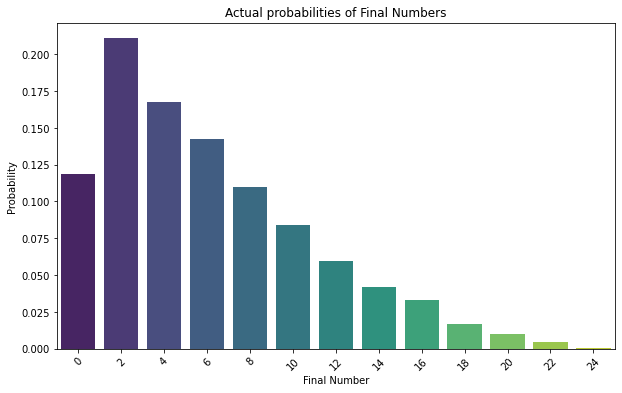

In [49]:
def monte_carlo_simulation(num_papers = 24, num_simulations=10000):
    outcomes = []

    for _ in range(num_simulations):
        papers = list(range(1, num_papers + 1))
        while len(papers) > 1:
            
            a, b = np.random.choice(papers, size=2, replace=False)
            papers.remove(a)
            papers.remove(b)
            papers.append(abs(a - b))
        
        outcomes.append(papers[0])
    
    # Count occurrences and calculate probabilities
    outcome_counts = Counter(outcomes)
    probabilities = {outcome: count / num_simulations for outcome, count in outcome_counts.items()}
    
    return probabilities

# 24 pieces of paper
probabilities = monte_carlo_simulation(num_papers = 24, num_simulations=10000)


for outcome, probability in sorted(probabilities.items()):
    print(f"Final number {outcome}: Probability = {probability:.4f}")


outcomes = list(probabilities.keys())
probs = [probabilities[outcome] for outcome in outcomes]


plt.figure(figsize=(10, 6))
sns.barplot(x=outcomes, y=probs, palette="viridis")
plt.title("Actual probabilities of Final Numbers")
plt.xlabel("Final Number")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.show()

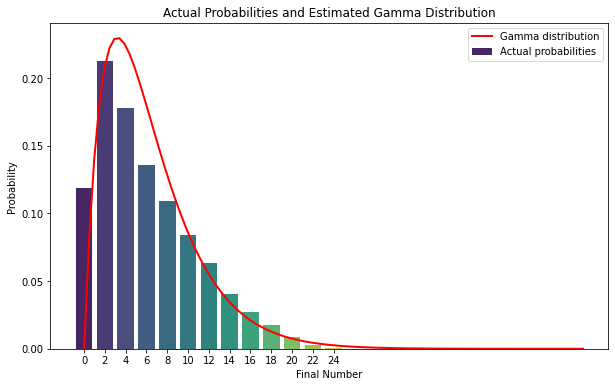

In [56]:
probabilities = monte_carlo_simulation(num_papers = 24, num_simulations=10000)
outcomes = np.array(list(probabilities.keys()))
probs = np.array([probabilities[outcome] for outcome in outcomes])


plt.figure(figsize=(10, 6))
sns.barplot(x=outcomes, y=probs, palette="viridis", label="Actual probabilities")

# Parameters
a = 2  # shape parameter
scale = 1.6  # scale parameter

x = np.linspace(0, outcomes.max(), 100)
y = gamma.pdf(x, a, scale=scale)

plt.plot(x, y, 'r-', lw=2, label="Gamma distribution")
plt.title("Actual Probabilities and Estimated Gamma Distribution")
plt.xlabel("Final Number")
plt.ylabel("Probability")
plt.legend()
plt.show()


# Fit with Poisson distribution

4.2181999999999995


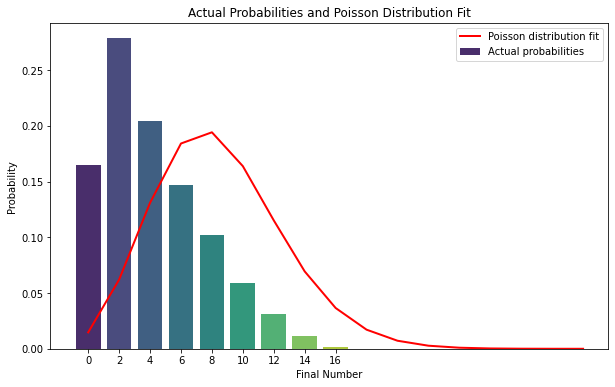

In [64]:
def monte_carlo_simulation(num_papers = 16, num_simulations=10000):
    outcomes = []

    for _ in range(num_simulations):
        papers = list(range(1, num_papers + 1))
        while len(papers) > 1:
            a, b = np.random.choice(papers, size=2, replace=False)
            papers.remove(a)
            papers.remove(b)
            papers.append(abs(a - b))
        
        outcomes.append(papers[0])
    
    # Count occurrences and calculate probabilities
    outcome_counts = Counter(outcomes)
    probabilities = {outcome: count / num_simulations for outcome, count in outcome_counts.items()}
    
    return probabilities

probabilities = monte_carlo_simulation(num_papers=16, num_simulations=10000)

# Calculate lambda 
lambda_ = np.dot(list(probabilities.keys()), list(probabilities.values()))
print(lambda_)
# Generate the Poisson distribution values for the plot
max_outcome = max(probabilities.keys())
x = np.arange(0, max_outcome+1)
poisson_values = poisson.pmf(x, lambda_)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(probabilities.keys()), y=list(probabilities.values()), palette="viridis", label='Actual probabilities')

plt.plot(x, poisson_values, 'r-', lw=2, label='Poisson distribution fit')

plt.title("Actual Probabilities and Poisson Distribution Fit")
plt.xlabel("Final Number")
plt.ylabel("Probability")
plt.legend()
plt.show()
